# Anomaly Detection in Univariate Time Series with Random Forest, in the context of WISDom project: Exploratory Data Analysis (EDA)

### Flow Rate Data from a sensor in a Water Sypply System located in Barreiro
### Holidays since 1970 to 2029 (+ 3 regional holidays of 2018)

## Start

### Import necessary libraries

In [1]:
# Basics
import pandas as pd
import numpy as np
import time as tm
import math
# For Exploratory Data Analysis (EDA)
import seaborn as sns; sns.set()
# Alias for set_theme(), which is the preferred interface.
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [2]:
# Names of the columns
features = ["date", "time", "value", "detection"]

train = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/train_barreiro_1.csv', sep = ';', names = features)

test = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/test_barreiro_1.csv', sep = ';', names = features)

# train_barreiro 1,2,3,4
# test_barreiro 1,2,3,4

holidays = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/holidays2018.csv',sep=';')

#### Visualize data

In [3]:
# Sets the value of the specified option
pd.set_option('display.max_rows', 100)

Train

In [4]:
# Return the first n rows
train.head(15)

,date,time,value,detection
0,03/05/2018,00:07:30,13.026578,0
1,03/05/2018,00:22:30,10.898906,0
2,03/05/2018,00:37:30,11.048772,0
3,03/05/2018,00:52:30,10.641706,0
4,03/05/2018,01:07:30,10.452578,0
5,03/05/2018,01:22:30,8.923089,0
6,03/05/2018,01:37:30,8.638289,0
7,03/05/2018,01:52:30,8.334467,0
8,03/05/2018,02:07:30,8.100783,0
9,03/05/2018,02:22:30,8.706250,0


#### date
Start: 03/05/2018 (Thursday)
Finish: 09/05/2018 (Wednesday)
Missing: 05 and 06/05/2018 (Weekend)

#### time
Start: 00:07:30h
End: 23:52:30h
Break: 15 min 

Test

In [5]:
# Return the first n rows
test.head(15)

,date,time,value,detection
0,10/05/2018,00:07:30,15.713694,0
1,10/05/2018,00:22:30,14.460300,0
2,10/05/2018,00:37:30,14.975789,0
3,10/05/2018,00:52:30,14.658967,0
4,10/05/2018,01:07:30,11.786478,0
5,10/05/2018,01:22:30,10.446106,0
6,10/05/2018,01:37:30,17.025783,0
7,10/05/2018,01:52:30,17.597394,0
8,10/05/2018,02:07:30,16.407461,0
9,10/05/2018,02:22:30,15.341344,0


#### date
Single day: 10/05/2018 (Thursday)

#### time
Time = train

Holidays

In [6]:
# Return the first n rows
holidays.head(15)

,date
0,01/01/1970
1,27/03/1970
2,29/03/1970
3,28/05/1970
4,05/10/1970
5,01/11/1970
6,01/12/1970
7,25/04/1970
8,01/05/1970
9,10/06/1970


## Datasets info

#### Features

Train

In [7]:
# Names of columns
print('Feature Names')
print(train.columns)

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')


Test

In [8]:
# Names of columns
print('Feature Names')
print(test.columns)

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')


Holidays

In [9]:
# Names of columns
print('Feature Names')
print(holidays.columns)

Feature Names
Index(['date'], dtype='object')


#### Data dimension

Train

In [10]:
print('Data Dimension:')
print('Number of Records:', train.shape[0])
print('Number of Features:', train.shape[1])

Data Dimension:
Number of Records: 480
Number of Features: 4


Test

In [11]:
print('Data Dimension:')
print('Number of Records:', test.shape[0])
print('Number of Features:', test.shape[1])

Data Dimension:
Number of Records: 96
Number of Features: 4


Holidays

In [12]:
print('Data Dimension:')
print('Number of Records:', holidays.shape[0])
print('Number of Features:', holidays.shape[1])

Data Dimension:
Number of Records: 767
Number of Features: 1


#### Shape

Train

In [13]:
#  Returns the shape of an array
train.shape

(480, 4)

Test

In [14]:
#  Returns the shape of an array
test.shape

(96, 4)

Holidays

In [15]:
#  Returns the shape of an array
holidays.shape

(767, 1)

#### Info (types)

Train

In [16]:
# Understand the data type of each feature
# .info() to get a concise summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB


Test

In [17]:
# Understand the data type of each feature
# .info() to get a concise summary of the dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       96 non-null     object 
 1   time       96 non-null     object 
 2   value      96 non-null     float64
 3   detection  96 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


Holidays

In [18]:
# Understand the data type of each feature
# .info() to get a concise summary of the dataframe
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    767 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### Missing values

Train

In [19]:
# Discover how many data is missing
missing_train = train.isnull().sum()

print(missing_train)

date         0
time         0
value        0
detection    0
dtype: int64


Test

In [20]:
# Discover how many data is missing
missing_test = test.isnull().sum()

print(missing_test)

date         0
time         0
value        0
detection    0
dtype: int64


Holidays

In [21]:
# Discover how many data is missing
missing_holidays = holidays.isnull().sum()

print(missing_holidays)

date    0
dtype: int64


In [ ]:
# Per summary there aren't null values.

### Skewnes

In [ ]:
# The skewness for a normal distribution is zero, and any symmetric data
# should have a skewness near zero.
# Negative values for the skewness indicate data that are skewed left and positive values for the
# skewness indicate data that are skewed right.
# By skewed left, it means that the left tail is long relative to the right tail.
# Similarly, skewed right means that the right tail is long relative to the left tail.

Train

In [22]:
print('Skewness of the below features:')
print(train.skew())

Skewness of the below features:
value       -0.156563
detection    0.000000
dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

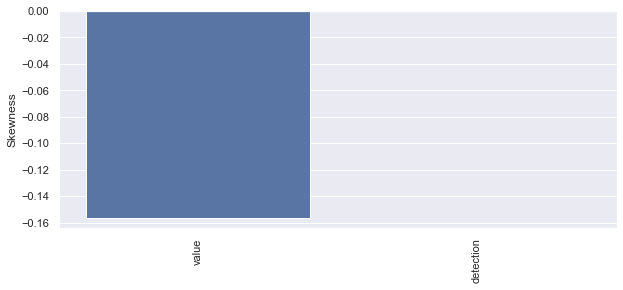

In [23]:
# Graph view
skew_train = train.skew()
skew_train = pd.DataFrame(skew_train, index = None, columns = ['Skewness'])
plt.figure(figsize=(10,4))
sns.barplot(x = skew_train.index, y = 'Skewness', data = skew_train)
plt.xticks(rotation = 90)

Test

In [24]:
print('Skewness of the below features:')
print(test.skew())

Skewness of the below features:
value       -0.104418
detection    2.038954
dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

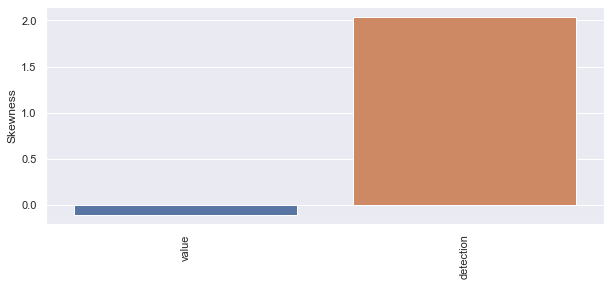

In [25]:
# Graph view
skew_test = test.skew()
skew_test = pd.DataFrame(skew_test, index = None, columns = ['Skewness'])
plt.figure(figsize=(10,4))
sns.barplot(x = skew_test.index, y = 'Skewness', data = skew_test)
plt.xticks(rotation = 90)

In [ ]:
# Negative Skewness value is expected, since we will not have a symmetric distribution of the data due to the water consumption patterns.

### Datetime

#### Check if pandas is handling the DATE column as simple objects or pandas built-in Datetime data type

Train

In [26]:
train.date

0      03/05/2018
1      03/05/2018
2      03/05/2018
3      03/05/2018
4      03/05/2018
          ...    
475    09/05/2018
476    09/05/2018
477    09/05/2018
478    09/05/2018
479    09/05/2018
Name: date, Length: 480, dtype: object

Test

In [27]:
test.date

0     10/05/2018
1     10/05/2018
2     10/05/2018
3     10/05/2018
4     10/05/2018
5     10/05/2018
6     10/05/2018
7     10/05/2018
8     10/05/2018
9     10/05/2018
10    10/05/2018
11    10/05/2018
12    10/05/2018
13    10/05/2018
14    10/05/2018
15    10/05/2018
16    10/05/2018
17    10/05/2018
18    10/05/2018
19    10/05/2018
20    10/05/2018
21    10/05/2018
22    10/05/2018
23    10/05/2018
24    10/05/2018
25    10/05/2018
26    10/05/2018
27    10/05/2018
28    10/05/2018
29    10/05/2018
30    10/05/2018
31    10/05/2018
32    10/05/2018
33    10/05/2018
34    10/05/2018
35    10/05/2018
36    10/05/2018
37    10/05/2018
38    10/05/2018
39    10/05/2018
40    10/05/2018
41    10/05/2018
42    10/05/2018
43    10/05/2018
44    10/05/2018
45    10/05/2018
46    10/05/2018
47    10/05/2018
48    10/05/2018
49    10/05/2018
50    10/05/2018
51    10/05/2018
52    10/05/2018
53    10/05/2018
54    10/05/2018
55    10/05/2018
56    10/05/2018
57    10/05/2018
58    10/05/20

Holidays

In [28]:
holidays.date

0      01/01/1970
1      27/03/1970
2      29/03/1970
3      28/05/1970
4      05/10/1970
          ...    
762    08/12/2029
763    25/12/2029
764    28/06/2018
765    10/05/2018
766    07/09/2018
Name: date, Length: 767, dtype: object

#### As dealing with simple objects, we need to convert to Datetime

Train

In [53]:
# Convert argument to datetime. In this case, convert object data type to datetime.
#train.date = pd.to_datetime(train.date)
#train.date

0     2018-03-05
1     2018-03-05
2     2018-03-05
3     2018-03-05
4     2018-03-05
         ...    
475   2018-09-05
476   2018-09-05
477   2018-09-05
478   2018-09-05
479   2018-09-05
Name: date, Length: 480, dtype: datetime64[ns]

Test

In [54]:
# Convert argument to datetime. In this case, convert object data type to datetime.
#test.date = pd.to_datetime(test.date)
#test.date

0    2018-10-05
1    2018-10-05
2    2018-10-05
3    2018-10-05
4    2018-10-05
5    2018-10-05
6    2018-10-05
7    2018-10-05
8    2018-10-05
9    2018-10-05
10   2018-10-05
11   2018-10-05
12   2018-10-05
13   2018-10-05
14   2018-10-05
15   2018-10-05
16   2018-10-05
17   2018-10-05
18   2018-10-05
19   2018-10-05
20   2018-10-05
21   2018-10-05
22   2018-10-05
23   2018-10-05
24   2018-10-05
25   2018-10-05
26   2018-10-05
27   2018-10-05
28   2018-10-05
29   2018-10-05
30   2018-10-05
31   2018-10-05
32   2018-10-05
33   2018-10-05
34   2018-10-05
35   2018-10-05
36   2018-10-05
37   2018-10-05
38   2018-10-05
39   2018-10-05
40   2018-10-05
41   2018-10-05
42   2018-10-05
43   2018-10-05
44   2018-10-05
45   2018-10-05
46   2018-10-05
47   2018-10-05
48   2018-10-05
49   2018-10-05
50   2018-10-05
51   2018-10-05
52   2018-10-05
53   2018-10-05
54   2018-10-05
55   2018-10-05
56   2018-10-05
57   2018-10-05
58   2018-10-05
59   2018-10-05
60   2018-10-05
61   2018-10-05
62   201

Holidays

In [41]:
# Convert argument to datetime. In this case, convert object data type to datetime.
holidays.date = pd.to_datetime(holidays.date)
holidays.date

0     1970-01-01
1     1970-03-27
2     1970-03-29
3     1970-05-28
4     1970-10-05
         ...    
759   2029-05-01
760   2029-06-10
761   2029-08-15
762   2029-12-08
763   2029-12-25
Name: date, Length: 764, dtype: datetime64[ns]

In [ ]:
# This step did not occur in the same way for all datasets - train and test. The month and day parameters were swapped.
# Chance that it happened because of the format in the csv files being different.

In [ ]:
# Note
# Return type depends on input:

# list-like: DatetimeIndex
# Series: Series of datetime64 dtype
# scalar: Timestamp

#### Describe

Train

In [29]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values.
train.describe()

,value,detection
count,480.000000,480.0
mean,31.256771,0.0
std,13.692021,0.0
min,6.946067,0.0
25%,17.894051,0.0
50%,32.824428,0.0
75%,42.523351,0.0
max,61.885283,0.0


In [ ]:
# Average 5-day flow rate: 31.26

Test

In [30]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values.
test.describe()

,value,detection
count,96.000000,96.000000
mean,36.662150,0.145833
std,14.406104,0.354792
min,9.905856,0.000000
25%,23.825503,0.000000
50%,38.182617,0.000000
75%,45.985352,0.000000
max,64.691383,1.000000


In [ ]:
# Average flow rate on Thursday of the following week: 36.66

In [ ]:
# Relevant if we want to analyse the average flow rate for each day, or both Thursdays.

Holidays

In [31]:
# Descriptive statistics, excluding NaN values.
holidays.describe()

,date
count,767
unique,767
top,25/12/1979
freq,1


In [ ]:
# It appears when we are looking only at categorical variables in a DataFrame.
# The date column is as object data type.

#### When an event occurred

In [32]:
# When an event occurs, it is categorised with the binary number 1. Otherwise, it is identified as 0.
train[train['detection']==1]

,date,time,value,detection


In [ ]:
# This means that no event is recorded in the training data set.
# It makes sense to train the algorithm with some random events.

In [33]:
# When an event occurs, it is categorised with the binary number 1. Otherwise, it is identified as 0.
test[test['detection']==1]

,date,time,value,detection
16,10/05/2018,04:07:30,18.061694,1
17,10/05/2018,04:22:30,17.910167,1
18,10/05/2018,04:37:30,22.092593,1
19,10/05/2018,04:52:30,22.449994,1
20,10/05/2018,05:07:30,28.190661,1
21,10/05/2018,05:22:30,34.791993,1
22,10/05/2018,05:37:30,39.085206,1
23,10/05/2018,05:52:30,40.195833,1
24,10/05/2018,06:07:30,43.702622,1
25,10/05/2018,06:22:30,41.648044,1


In [ ]:
# Result:
# A burst occurred on the 10th of February, from 04:07h to 07:22h.
# The test dataset only has data for 1 day (24h).
# The result means that in that time 1 burst occurred.

## Data Transformation for EDA

### Convert index using specified date_format

#### Convert date in format d/m/y to date in format y/m/d represented in the column "int_date"

In [34]:
# dt.strftime convert index using specified date_format

# Train
train['int_date'] = pd.to_datetime(train['date'],dayfirst=True).dt.strftime("%Y%m%d").astype(int)
# Test
test['int_date'] = pd.to_datetime(test['date'],dayfirst=True).dt.strftime("%Y%m%d").astype(int)
# Holidays
holidays['int_date'] = pd.to_datetime(holidays['date'],dayfirst=True).dt.strftime("%Y%m%d").astype(int)

Train

In [35]:
train

,date,time,value,detection,int_date
0,03/05/2018,00:07:30,13.026578,0,20180503
1,03/05/2018,00:22:30,10.898906,0,20180503
2,03/05/2018,00:37:30,11.048772,0,20180503
3,03/05/2018,00:52:30,10.641706,0,20180503
4,03/05/2018,01:07:30,10.452578,0,20180503
...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509
476,09/05/2018,23:07:30,19.707922,0,20180509
477,09/05/2018,23:22:30,19.546844,0,20180509
478,09/05/2018,23:37:30,21.068406,0,20180509


Test

In [36]:
test

,date,time,value,detection,int_date
0,10/05/2018,00:07:30,15.713694,0,20180510
1,10/05/2018,00:22:30,14.460300,0,20180510
2,10/05/2018,00:37:30,14.975789,0,20180510
3,10/05/2018,00:52:30,14.658967,0,20180510
4,10/05/2018,01:07:30,11.786478,0,20180510
5,10/05/2018,01:22:30,10.446106,0,20180510
6,10/05/2018,01:37:30,17.025783,0,20180510
7,10/05/2018,01:52:30,17.597394,0,20180510
8,10/05/2018,02:07:30,16.407461,0,20180510
9,10/05/2018,02:22:30,15.341344,0,20180510


Holidays

In [37]:
holidays

,date,int_date
0,01/01/1970,19700101
1,27/03/1970,19700327
2,29/03/1970,19700329
3,28/05/1970,19700528
4,05/10/1970,19701005
...,...,...
762,08/12/2029,20291208
763,25/12/2029,20291225
764,28/06/2018,20180628
765,10/05/2018,20180510


### Checks for holidays in the datasets

In [38]:
# Function to check holidays on a dataset

def check_holiday(df,holi_df):
    
    index_to_drop = []
    count = 0
    for i in df['int_date'].values:
        if i in holi_df['int_date'].values:
            index_to_drop.append(count)
        count+=1
        
    dropped_df = df.drop(index_to_drop)
    
    return dropped_df

Train

In [39]:
# Check holidays from the "train" dataset using the dataset with holidays
train_holidays = check_holiday(train,holidays)
train_holidays

,date,time,value,detection,int_date
0,03/05/2018,00:07:30,13.026578,0,20180503
1,03/05/2018,00:22:30,10.898906,0,20180503
2,03/05/2018,00:37:30,11.048772,0,20180503
3,03/05/2018,00:52:30,10.641706,0,20180503
4,03/05/2018,01:07:30,10.452578,0,20180503
...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509
476,09/05/2018,23:07:30,19.707922,0,20180509
477,09/05/2018,23:22:30,19.546844,0,20180509
478,09/05/2018,23:37:30,21.068406,0,20180509


In [ ]:
# This means that there are no holidays in the "train" dataset, 
# as the resulting dataset has the same number of records.

Test

In [40]:
# Check holidays from the "test" dataset using the dataset with holidays
test_holidays = check_holiday(test,holidays)
test_holidays

,date,time,value,detection,int_date


In [ ]:
# Please note: different output, but with the same meaning as the previous result - there are no holidays in the test dataset.

### Another way to check for holidays in the desired dataset

Train

In [42]:
# Merge DataFrame or named Series objects with a database-style join.
# The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored.
# Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.
# When performing a cross merge, no column specifications to merge on are allowed.

train_holi = train.merge(holidays, how='inner', on=['int_date'])

# how is the type of merge to be performed
# inner: use union of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
# date_x because it's the "date" column of the left dataset
# date_y because it's the "date" column of the right dataset
train_holi

,date_x,time,value,detection,int_date,date_y


Test

In [43]:
# Same as the previous step for another data set

test_holi = test.merge(holidays, how='inner', on=['int_date'])
test_holi

,date_x,time,value,detection,int_date,date_y
0,10/05/2018,00:07:30,15.713694,0,20180510,10/05/2018
1,10/05/2018,00:22:30,14.460300,0,20180510,10/05/2018
2,10/05/2018,00:37:30,14.975789,0,20180510,10/05/2018
3,10/05/2018,00:52:30,14.658967,0,20180510,10/05/2018
4,10/05/2018,01:07:30,11.786478,0,20180510,10/05/2018
5,10/05/2018,01:22:30,10.446106,0,20180510,10/05/2018
6,10/05/2018,01:37:30,17.025783,0,20180510,10/05/2018
7,10/05/2018,01:52:30,17.597394,0,20180510,10/05/2018
8,10/05/2018,02:07:30,16.407461,0,20180510,10/05/2018
9,10/05/2018,02:22:30,15.341344,0,20180510,10/05/2018


In [ ]:
# Conclusion: same result, different output.

### New column: Timestamp

Train

In [39]:
train['timestamp'] = pd.to_datetime(train['time'])
train

,date,time,value,detection,int_date,timestamp
0,03/05/2018,00:07:30,13.026578,0,20180503,2021-04-09 00:07:30
1,03/05/2018,00:22:30,10.898906,0,20180503,2021-04-09 00:22:30
2,03/05/2018,00:37:30,11.048772,0,20180503,2021-04-09 00:37:30
3,03/05/2018,00:52:30,10.641706,0,20180503,2021-04-09 00:52:30
4,03/05/2018,01:07:30,10.452578,0,20180503,2021-04-09 01:07:30
...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,2021-04-09 22:52:30
476,09/05/2018,23:07:30,19.707922,0,20180509,2021-04-09 23:07:30
477,09/05/2018,23:22:30,19.546844,0,20180509,2021-04-09 23:22:30
478,09/05/2018,23:37:30,21.068406,0,20180509,2021-04-09 23:37:30


Test

In [40]:
test['timestamp'] = pd.to_datetime(test['time'])
test

,date,time,value,detection,int_date,timestamp
0,10/05/2018,00:07:30,15.713694,0,20180510,2021-04-09 00:07:30
1,10/05/2018,00:22:30,14.460300,0,20180510,2021-04-09 00:22:30
2,10/05/2018,00:37:30,14.975789,0,20180510,2021-04-09 00:37:30
3,10/05/2018,00:52:30,14.658967,0,20180510,2021-04-09 00:52:30
4,10/05/2018,01:07:30,11.786478,0,20180510,2021-04-09 01:07:30
5,10/05/2018,01:22:30,10.446106,0,20180510,2021-04-09 01:22:30
6,10/05/2018,01:37:30,17.025783,0,20180510,2021-04-09 01:37:30
7,10/05/2018,01:52:30,17.597394,0,20180510,2021-04-09 01:52:30
8,10/05/2018,02:07:30,16.407461,0,20180510,2021-04-09 02:07:30
9,10/05/2018,02:22:30,15.341344,0,20180510,2021-04-09 02:22:30


In [ ]:
# Note: records the date on which the script is being developed.

The hours of the datetime:
00:00:00h - 0
...
07:00:00h - 7

The minutes of the datetime:
00:00:00h - 0
...
00:01:00h - 1

The seconds of the datetime:
00:00:00h - 0
...
00:00:01h - 1

Example: 00:07:30h - (0x3600)+(7x60)+(30) = 450

#### Convert time in seconds

In [41]:
# Train
train['timestamp'] = train['timestamp'].dt.hour * 3600 + \
              train['timestamp'].dt.minute * 60 + \
              train['timestamp'].dt.second
# Test
test['timestamp'] = test['timestamp'].dt.hour * 3600 + \
              test['timestamp'].dt.minute * 60 + \
              test['timestamp'].dt.second

Train

In [42]:
train

,date,time,value,detection,int_date,timestamp
0,03/05/2018,00:07:30,13.026578,0,20180503,450
1,03/05/2018,00:22:30,10.898906,0,20180503,1350
2,03/05/2018,00:37:30,11.048772,0,20180503,2250
3,03/05/2018,00:52:30,10.641706,0,20180503,3150
4,03/05/2018,01:07:30,10.452578,0,20180503,4050
...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350
476,09/05/2018,23:07:30,19.707922,0,20180509,83250
477,09/05/2018,23:22:30,19.546844,0,20180509,84150
478,09/05/2018,23:37:30,21.068406,0,20180509,85050


Test

In [43]:
test.head(5)

,date,time,value,detection,int_date,timestamp
0,10/05/2018,00:07:30,15.713694,0,20180510,450
1,10/05/2018,00:22:30,14.460300,0,20180510,1350
2,10/05/2018,00:37:30,14.975789,0,20180510,2250
3,10/05/2018,00:52:30,14.658967,0,20180510,3150
4,10/05/2018,01:07:30,11.786478,0,20180510,4050


In [ ]:
# Interesting for Exploratory Data Analysis.

### Day of Week

0 - monday 
1 - tuesday
2 - wednesday
3 - thursday
4 - friday

In [44]:
# Train
train['dayofweek'] = pd.to_datetime(train['date'],dayfirst=True)
train['dayofweek'] = train['dayofweek'].dt.dayofweek
# Test
test['dayofweek'] = pd.to_datetime(test['date'],dayfirst=True)
test['dayofweek'] = test['dayofweek'].dt.dayofweek

Train

In [61]:
train.head(5)

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5


Test

In [46]:
test.head(5)

,date,time,value,detection,int_date,timestamp,dayofweek
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3


### Now with Month

1 - Jan
2 - Fev
3 - Mar
4 - Abr
...

In [47]:
# Train
train['month'] = pd.to_datetime(train['date'],dayfirst=True)
train['month'] = train['month'].dt.month
# Test
test['month'] = pd.to_datetime(test['date'],dayfirst=True)
test['month'] = test['month'].dt.month

Train

In [48]:
train.head(5)

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5


Test

In [49]:
test.head(5)

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3,5
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3,5
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3,5
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3,5
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3,5


In [ ]:
# Its the same month in both datasets.

### Detects outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique.

In the context of this project, outliers are anomalies detected.

#### Train

Text(0.5, 1.0, 'Detect outliers in train dataset')

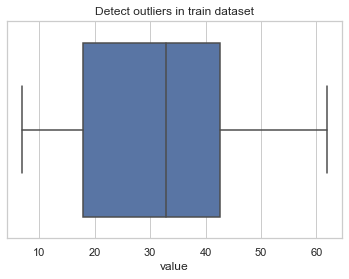

In [69]:
sns.boxplot(x=train['value']).set_title('Detect outliers in train dataset')

In [61]:
Q1 = train['value'].quantile(0.25)
Q3 = train['value'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range:", IQR)

Interquartile range: 24.6293


#### Test

Text(0.5, 1.0, 'Detect outliers in test dataset')

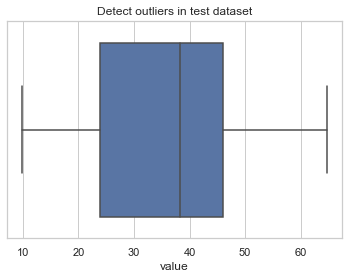

In [71]:
sns.boxplot(x=test['value']).set_title('Detect outliers in test dataset')

In [63]:
Q1 = test['value'].quantile(0.25)
Q3 = test['value'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range:", IQR)

Interquartile range: 22.1598495375


In [ ]:
# The results make sense since an event does not always mean a high flow rate.

### Per day of the week

Train

Text(0.5, 1.0, 'Detect outliers per day of week')

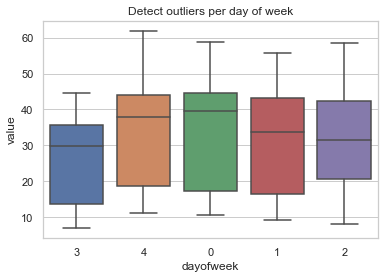

In [72]:
# Draw a vertical boxplot grouped by a categorical variable,
# Controling box order by passing an explicit order - order=[],
# Because the training dataset starts on a Thursday (3) and ends on Wednesday (2) of the following week.
sns.boxplot(x="dayofweek", y="value", data=train, order=[3,4,0,1,2]).set_title('Detect outliers per day of week')

In [ ]:
# With the day of the week in writing it would look better.

#### More explicit

Text(0.5, 1.0, 'Detect outliers per date')

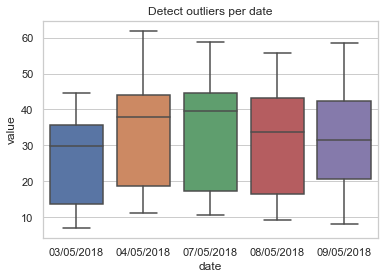

In [73]:
sns.boxplot(x="date", y="value", data=train).set_title('Detect outliers per date')

In [ ]:
# Without the year it would look better.

Test

Text(0.5, 1.0, 'Detect outliers per day of week')

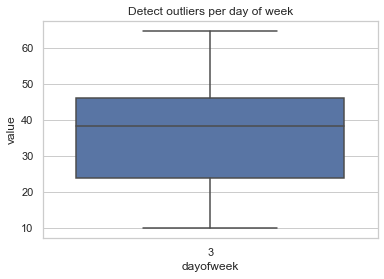

In [74]:
# Draw a vertical boxplot grouped by a categorical variable
sns.boxplot(x="dayofweek", y="value", data=test).set_title('Detect outliers per day of week')

### Grouping by detection anomaly

Test

Text(0.5, 1.0, 'Detect outliers considering whether (or not) it is an anomaly')

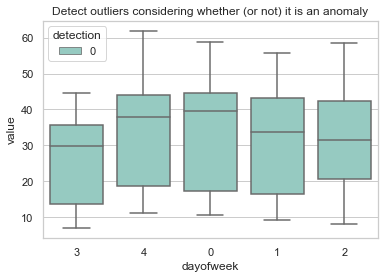

In [75]:
# Draw a boxplot with nested grouping by two categorical variables
sns.boxplot(x="dayofweek", y="value", hue="detection", data=train, palette="Set3", order=[3,4,0,1,2]).set_title('Detect outliers considering whether (or not) it is an anomaly')

In [ ]:
# linewidth=2.5 - line width

Train

Text(0.5, 1.0, 'Detect outliers considering whether (or not) it is an anomaly')

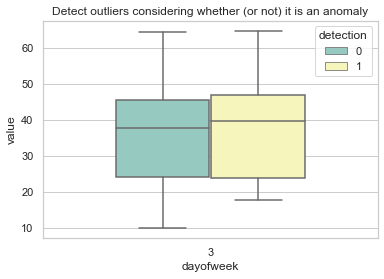

In [76]:
# Draw a boxplot with nested grouping by two categorical variables
sns.boxplot(x="dayofweek", y="value", hue="detection", data=test, palette="Set3").set_title('Detect outliers considering whether (or not) it is an anomaly')

In [ ]:
# The results make sense since an event does not always mean a high flow rate.

###  swarmplot() to show the datapoints on top of the boxes

Train

Text(0.5, 1.0, 'Datapoints on top of the boxes')

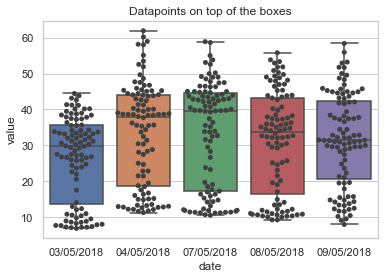

In [90]:
sns.boxplot(x="date", y="value", data=train)
sns.swarmplot(x="date", y="value", data=train, color=".25").set_title('Datapoints on top of the boxes')

Test

Text(0.5, 1.0, 'Datapoints on top of the boxes')

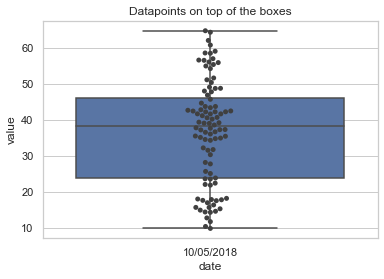

In [89]:
sns.boxplot(x="date", y="value", data=test)
sns.swarmplot(x="date", y="value", data=test, color=".25").set_title('Datapoints on top of the boxes')

## Exploratory Data Analysis (EDA)

### Distribution and Density

#### Feature Density

(kde plot — kernel density estimation plot)
Plot univariate distributions using kernel density estimation.
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Y label - Estimation of the relative frequency of each value.
In probabilistic terms, it is an estimate of the probability density function of the feature.

#### Value Density

Train

Text(0, 0.5, 'Frequency')

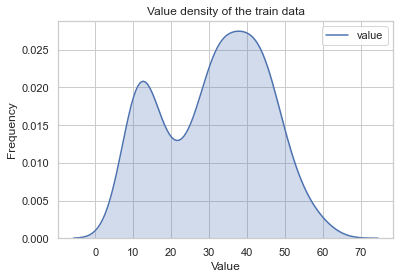

In [92]:
# Using shade to fill the area covered by curve
sns.kdeplot(train['value'], shade=True).set_title('Value density of the train data')
plt.xlabel('Value')
plt.ylabel('Frequency')

Test

Text(0, 0.5, 'Frequency')

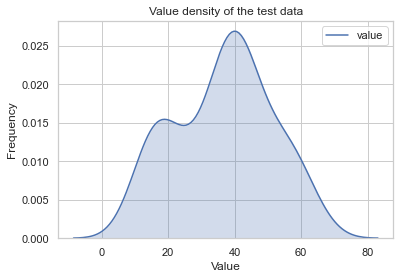

In [91]:
# Using shade to fill the area covered by curve
sns.kdeplot(test['value'], shade=True).set_title('Value density of the test data')
plt.xlabel('Value')
plt.ylabel('Frequency')

#### Distplot

Train

Text(0, 0.5, 'Frequency')

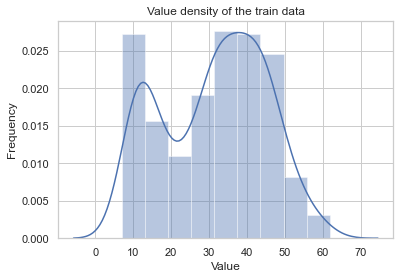

In [94]:
sns.distplot(train['value']).set_title('Value density of the train data')
plt.xlabel('Value')
plt.ylabel('Frequency')

Test

Text(0, 0.5, 'Frequency')

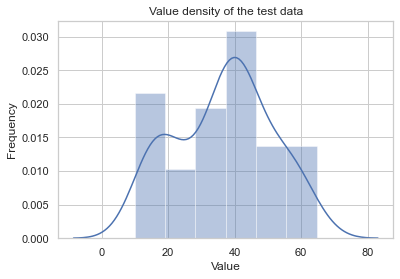

In [95]:
sns.distplot(test['value']).set_title('Value density of the test data')
plt.xlabel('Value')
plt.ylabel('Frequency')

Based on the observation of the previous graphs that represent the distribution of the water flow rate on days of the week, the distribution of the data in the training and test data sets is similar. There are two peaks, concentrated around 10 and 40 (UNITS). We can conclude that the peak with an average of 10 represents the constant flow during the day, and the peak with an average of 40 represents the flow rate during periods of higher water consumption - meals.

### Categorical Data

#### Breakdown of events by anomaly

Train

Text(0.5, 1.0, 'Count of normal comsumption and anomalous events (Train)')

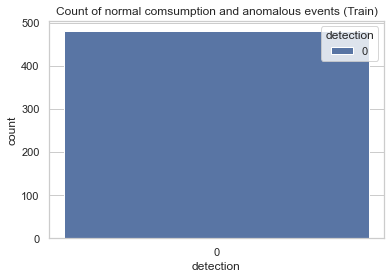

In [107]:
sns.countplot(x='detection', hue='detection', data=train).set_title('Count of normal comsumption and anomalous events (Train)')

Test

Text(0.5, 1.0, 'Count of normal comsumption and anomalous events (Test)')

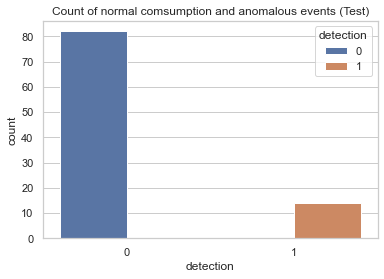

In [108]:
sns.countplot(x='detection', hue='detection', data=test).set_title('Count of normal comsumption and anomalous events (Test)')

### Transforming binary numbers into strings

Train

In [118]:
train_encod={'detection':{0: 'normal consumption', 1: 'anomalous event'}}
train_encod

{'detection': {0: 'normal consumption', 1: 'anomalous event'}}

In [119]:
train_cat=train.replace(train_encod)
train_cat

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,03/05/2018,00:07:30,13.026578,normal consumption,20180503,450,3,5
1,03/05/2018,00:22:30,10.898906,normal consumption,20180503,1350,3,5
2,03/05/2018,00:37:30,11.048772,normal consumption,20180503,2250,3,5
3,03/05/2018,00:52:30,10.641706,normal consumption,20180503,3150,3,5
4,03/05/2018,01:07:30,10.452578,normal consumption,20180503,4050,3,5
...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,normal consumption,20180509,82350,2,5
476,09/05/2018,23:07:30,19.707922,normal consumption,20180509,83250,2,5
477,09/05/2018,23:22:30,19.546844,normal consumption,20180509,84150,2,5
478,09/05/2018,23:37:30,21.068406,normal consumption,20180509,85050,2,5


In [114]:
train

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5
...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350,2,5
476,09/05/2018,23:07:30,19.707922,0,20180509,83250,2,5
477,09/05/2018,23:22:30,19.546844,0,20180509,84150,2,5
478,09/05/2018,23:37:30,21.068406,0,20180509,85050,2,5


In [116]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    object 
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 28.2+ KB


Text(0.5, 1.0, 'Count of normal comsumption and anomalous events (Train)')

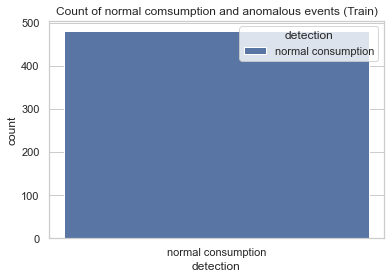

In [117]:
sns.countplot(x='detection', hue='detection', data=train_cat).set_title('Count of normal comsumption and anomalous events (Train)')

Test

In [120]:
test_encod={'detection':{0: 'normal consumption', 1: 'anomalous event'}}
test_encod

{'detection': {0: 'normal consumption', 1: 'anomalous event'}}

In [121]:
test_cat=test.replace(test_encod)
test_cat

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,10/05/2018,00:07:30,15.713694,normal consumption,20180510,450,3,5
1,10/05/2018,00:22:30,14.460300,normal consumption,20180510,1350,3,5
2,10/05/2018,00:37:30,14.975789,normal consumption,20180510,2250,3,5
3,10/05/2018,00:52:30,14.658967,normal consumption,20180510,3150,3,5
4,10/05/2018,01:07:30,11.786478,normal consumption,20180510,4050,3,5
5,10/05/2018,01:22:30,10.446106,normal consumption,20180510,4950,3,5
6,10/05/2018,01:37:30,17.025783,normal consumption,20180510,5850,3,5
7,10/05/2018,01:52:30,17.597394,normal consumption,20180510,6750,3,5
8,10/05/2018,02:07:30,16.407461,normal consumption,20180510,7650,3,5
9,10/05/2018,02:22:30,15.341344,normal consumption,20180510,8550,3,5


Text(0.5, 1.0, 'Count of normal comsumption and anomalous events (Test)')

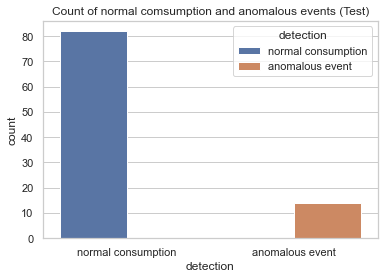

In [123]:
sns.countplot(x='detection', hue='detection', data=test_cat).set_title('Count of normal comsumption and anomalous events (Test)')

### Heatmap

Heat Maps is a type of plot which is necessary when we need to find the dependent variables.

Train

,value,detection,int_date,timestamp,dayofweek,month
value,1.000000,NaN,0.080530,0.570125,-0.050545,NaN
detection,NaN,NaN,NaN,NaN,NaN,NaN
int_date,0.080530,NaN,1.000000,0.000000,-0.671932,NaN
timestamp,0.570125,NaN,0.000000,1.000000,0.000000,NaN
dayofweek,-0.050545,NaN,-0.671932,0.000000,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN


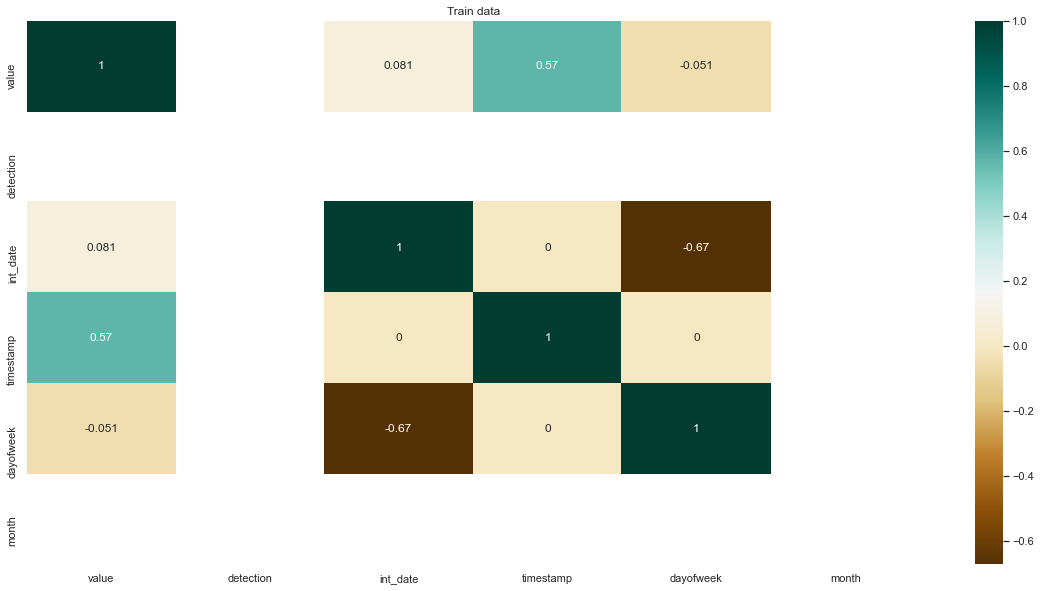

In [124]:
# Finds the relations between the variables.
plt.figure(figsize=(20,10))
c= train.corr()
sns.heatmap(c,cmap="BrBG",annot=True).set_title('Train data')
c

Test

,value,detection,int_date,timestamp,dayofweek,month
value,1.000000,0.030239,NaN,0.467296,NaN,NaN
detection,0.030239,1.000000,NaN,-0.372769,NaN,NaN
int_date,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,0.467296,-0.372769,NaN,1.000000,NaN,NaN
dayofweek,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN


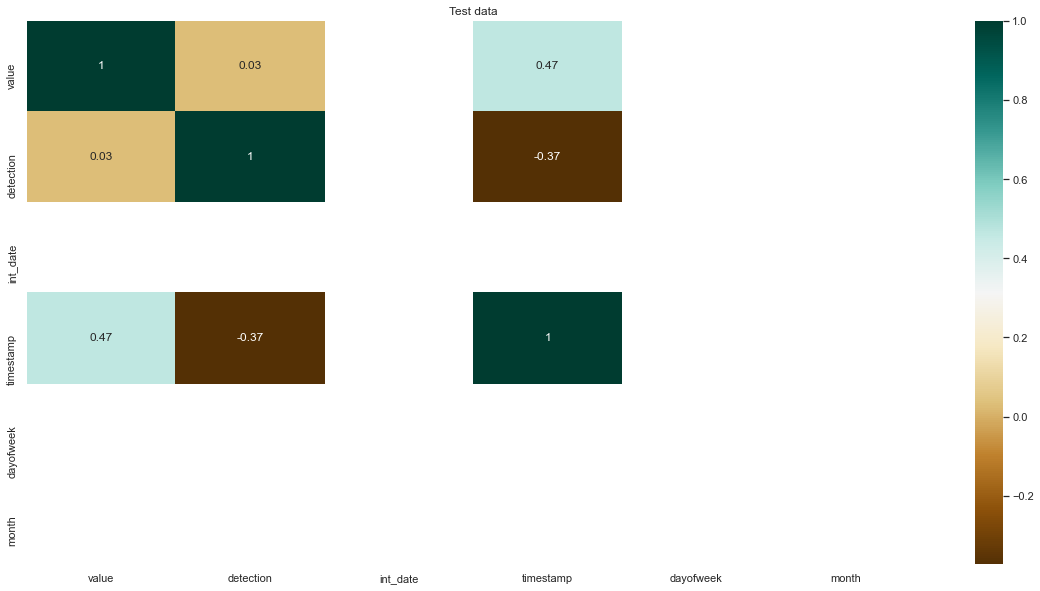

In [125]:
# Finds the relations between the variables.
plt.figure(figsize=(20,10))
c= test.corr()
sns.heatmap(c,cmap="BrBG",annot=True).set_title('Test data')
c
c

In [ ]:
# It is expected to find uncorrelated variables, since all data in the data set has the same value in a given column.

# In the context of the project, it is expected that we will find a strong correlation between the variables value and time (definition of time-series).

### Scatterplot

Generally use scatter plots to find the correlation between two variables. 

Train

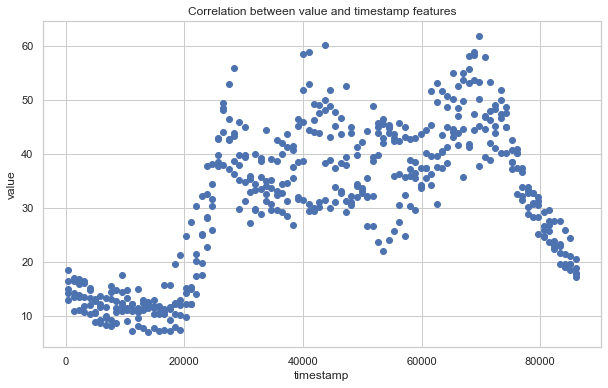

In [127]:
# Plot a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.title.set_text('Correlation between value and timestamp features') 
ax.scatter(train['timestamp'], train['value'])
ax.set_xlabel('timestamp')
ax.set_ylabel('value')
plt.show()

Test

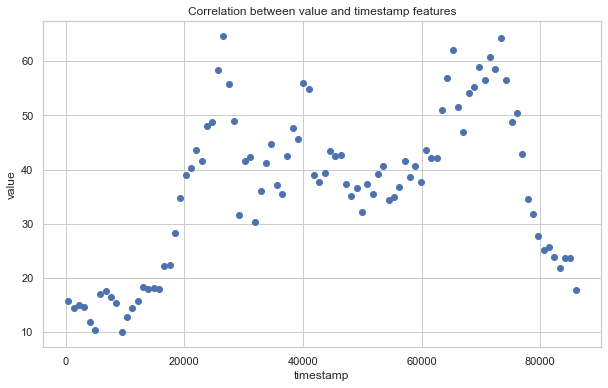

In [126]:
# Plot a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.title.set_text('Correlation between value and timestamp features') 
ax.scatter(test['timestamp'], test['value'])
ax.set_xlabel('timestamp')
ax.set_ylabel('value')
plt.show()

In [ ]:
# Less data volume, similar distribution.

## Data Cleaning post EDA

#### Drop irrelevant columns

Train

In [ ]:
# Sugestion: 'detection', 'month'

Test

In [ ]:
# Sugestion: 'date', 'intdate', 'dayofweek', 'month'

#### Group the data

In [ ]:
# Group training dataset data by weekdays